<a href="https://colab.research.google.com/github/wanasyraf4/Ikan_kekek2/blob/main/fish_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



from scipy import ndimage

from google.colab import drive

drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/Dataset/image_1.jpg"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Enter image

(540, 960, 3)


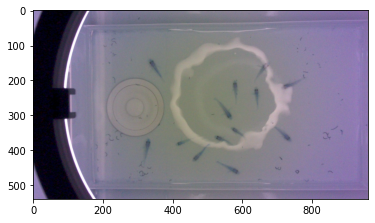

In [59]:
# For colored Image
img = cv2.imread (path,1)   

# img.shape
from google.colab.patches import cv2_imshow

#dimension
dim_img = img.shape
print(dim_img)

plt.imshow(img)


invert

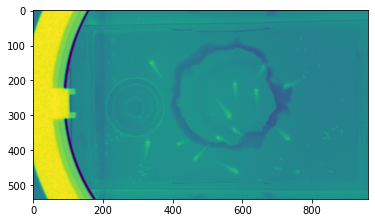

In [60]:
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g = cv2.bitwise_not(g)
plt.imshow(g)



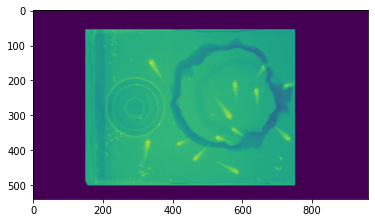

In [90]:

height, width= g.shape[:2]
ROI= np.array([[(150,500),(150,55),(750,55),(750,500)]], dtype= np.int32)

blank= np.zeros_like(g)


roi_g= cv2.fillPoly(blank, ROI,255)

roi_img= cv2.bitwise_and(g, roi_g)


plt.imshow( roi_img)


hist

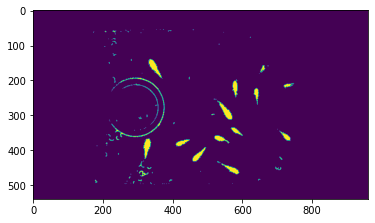

In [91]:
X = np.mean(roi_img)+ 1.23*np.std(roi_img)
(thresh, bw) = cv2.threshold(roi_img, X, 255, cv2.THRESH_BINARY)
plt.imshow(bw)

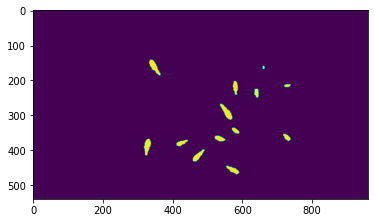

In [92]:
strel = np.ones((4,4),np.uint8)
# opening = cv2.getStructuringElement( cv2.MORPH_ELLIPSE,strel)
ellip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
# print(cv2.MORPH_OPEN)
result = cv2.morphologyEx(bw, cv2.MORPH_OPEN, ellip)
plt.imshow(result)

(540, 960)


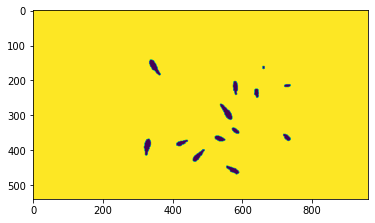

In [93]:

mask = np.full(result.shape,255)

bwboundary= mask - result
bwboundary = bwboundary.astype(np.uint8)

plt.imshow(bwboundary)


dim_bwboundary= bwboundary.shape
print(dim_bwboundary)


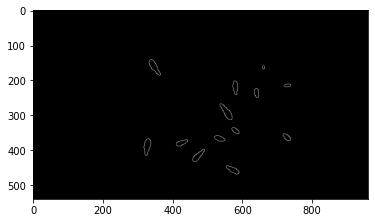

In [94]:
#bwboundary

canny = cv2.Canny(bwboundary, 30, 150, 3)
plt.imshow(canny, cmap ='gray')


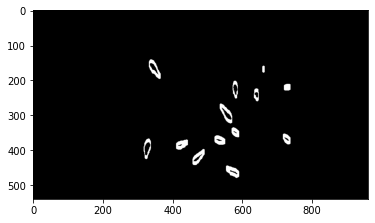

In [95]:
dilated = cv2.dilate(canny, (1,1), iterations = 10)
plt.imshow(dilated, cmap ='gray')

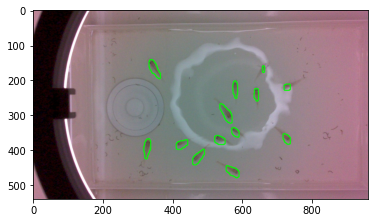

In [96]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [97]:
len(cnt)

13